# EDA for Suicide Rate around the Globe 1985-2016

The goal of this report is to find and compare the suicide rate around the world.
1. Find the top 5 and bottom 5 suicide rate countries around the world from 1985 - 2016
2. Compare 1985 vs 2016 suicide rate for the highest and lowest suicide rate for first and last rank countries
3. Compare the suicide rate for the the earliest and latest year collected in the data by age group for the first and last rank countries
4. Determine if there is a correlation between gdp and suicide rate

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
%matplotlib inline

In [2]:
suicide = pd.read_csv("master.csv")

In [3]:
suicide.shape

(27820, 12)

In [4]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [5]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
suicide.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

1. Find the top and bottom 5 suicide rate around the globe

In [7]:
suicide.pivot_table(values = 'suicides/100k pop', index='country',margins = True).reset_index().sort_values(by='suicides/100k pop',ascending=False).head(7)

,country,suicides/100k pop
52,Lithuania,40.415573
87,Sri Lanka,35.295152
75,Russian Federation,34.892377
40,Hungary,32.761516
11,Belarus,31.075913
47,Kazakhstan,30.511282
51,Latvia,29.259325


# 1. Find the top 5 and bottom 5 suicide rate countries around the world from 1985 - 2016

Top 5 countries are:
1. Lithuania : 40.4 suicides/ 100k population
2. Sri Lanka : 35.3
3. Russian Federation : 34.9
4. Hungary: 32.8
5. Belarus: 31.1

Lowest 5 countries are: 
 (excluded 'Dominica' and 'Saint Kitts and Nevis'since there were no values)  
1. Jamaica : 0.52
2. Antigua and Barbuda: 0.55
3. Oman : 0.74
4. South Africa: 0.96
5. Kuwait: 1.19

Since not all data are in the range of 1985 - 2016, find the years for the data collected

In [53]:
top5 = ['Lithuania','Sri Lanka','Russian Federation', 'Hungary', 'Belarus']
countries1 = suicide[suicide['country'].isin(top5)]

def year_info(year):
    countries = countries1[countries1['country'] == country]
    earliest = countries['year'].min()
    latest = countries['year'].max()
    print("{}'s suicide rate was collected from {} to {}".format(country,earliest,latest))
    
for country in suicide[suicide['country'].isin(top5)]['country'].unique():
    year_info(country)

Belarus's suicide rate was collected from 1990 to 2014
Hungary's suicide rate was collected from 1991 to 2016
Lithuania's suicide rate was collected from 1995 to 2016
Russian Federation's suicide rate was collected from 1989 to 2015
Sri Lanka's suicide rate was collected from 1985 to 2006


In [54]:
bottom5 = ['Jamaica','Antigua and Barbuda','Oman', 'South Africa', 'Kuwait']
countries2 = suicide[suicide['country'].isin(bottom5)]

def year_info(year):
    countries = countries2[countries2['country'] == country]
    earliest = countries['year'].min()
    latest = countries['year'].max()
    print("{}'s suicide rate was collected from {} to {}".format(country,earliest,latest))
    
for country in suicide[suicide['country'].isin(bottom5)]['country'].unique():
    year_info(country)

Antigua and Barbuda's suicide rate was collected from 1985 to 2015
Jamaica's suicide rate was collected from 1985 to 2011
Kuwait's suicide rate was collected from 1985 to 2014
Oman's suicide rate was collected from 2009 to 2014
South Africa's suicide rate was collected from 1996 to 2015


# 2. Compare the suicide rate for the earliest year vs the latest year of suicide rate data

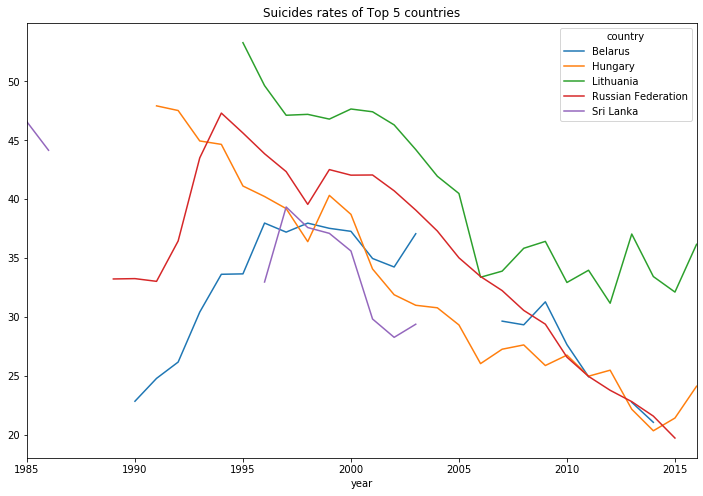

In [135]:
fig, ax = plt.subplots(figsize=(12, 8))
countries1.groupby(['year','country']).mean()['suicides/100k pop'].unstack().plot(ax=ax, title = "Suicides rates of Top 5 countries")

From the earliest year to the latest, the suicide rate went down over the years.

In [270]:
suicide1985 = suicide[suicide['year'] == 1985] # Begin: Sri Lanka, Antigua&Barbuda, Jamaica, Kuwait
suicide1989 = suicide[suicide['year'] == 1989] # Begin: Russian Federation
suicide1990 = suicide[suicide['year'] == 1990] # Begin: Belarus
suicide1991 = suicide[suicide['year'] == 1991] # Begin: Hungary
suicide1995 = suicide[suicide['year'] == 1995] # Begin: Lithuania
suicide1996 = suicide[suicide['year'] == 1996] # Begin: South Africa
suicide2009 = suicide[suicide['year'] == 2009] # Begin: Oman

suicide2006 = suicide[suicide['year'] == 2006] # End: Sri Lanka
suicide2011 = suicide[suicide['year'] == 2011] # End: Jamaica
suicide2014 = suicide[suicide['year'] == 2014] # End: Belarus, Kuwait, Oman 
suicide2015 = suicide[suicide['year'] == 2015] # End: Russia Federation, Antigua&Barbuda, South Africa
suicide2016 = suicide[suicide['year'] == 2016] # Emd: Hungary, Lithuania

## Top 5

In [127]:
suicide1990vs2014 = pd.concat([suicide1990, suicide2014]) # Belarus
suicide1991vs2016 = pd.concat([suicide1991, suicide2016]) # Hungary
suicide1995vs2016 = pd.concat([suicide1995, suicide2016]) # Lithuania
suicide1989vs2015 = pd.concat([suicide1989, suicide2015]) # Russian Federation
suicide1985vs2006 = pd.concat([suicide1985, suicide2006]) # Sri Lanka

suicide1990vs2014[suicide1990vs2014.country =='Belarus'].pivot_table('suicides/100k pop', index='year').reset_index()
suicide1991vs2016[suicide1991vs2016.country =='Hungary'].pivot_table('suicides/100k pop', index='year').reset_index()
suicide1995vs2016[suicide1995vs2016.country =='Lithuania'].pivot_table('suicides/100k pop', index='year').reset_index()
suicide1989vs2015[suicide1989vs2015.country =='Russian Federation'].pivot_table('suicides/100k pop', index='year').reset_index()
suicide1985vs2006[suicide1985vs2006.country =='Sri Lanka'].pivot_table('suicides/100k pop', index='year').reset_index()


,year,suicides/100k pop
0,1985,46.560000
1,2006,27.394167


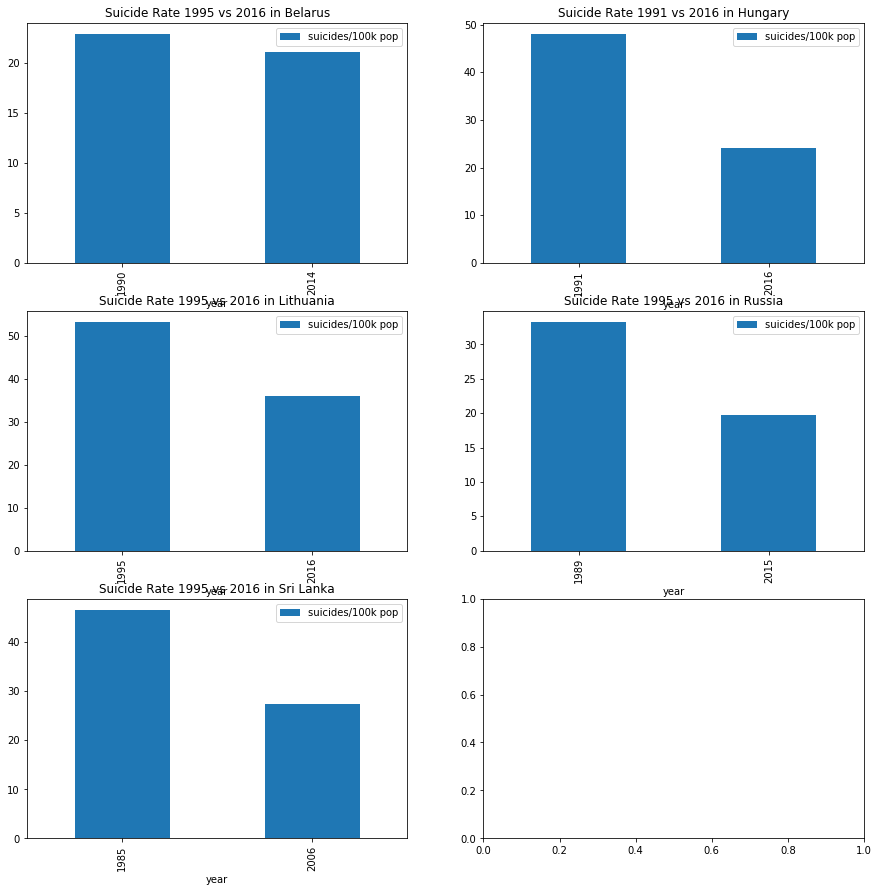

In [187]:
fig, axes = plt.subplots(3,2, figsize=(15,15))

Belarus1990vs2014 = suicide1990vs2014[suicide1990vs2014.country =='Belarus'].pivot_table('suicides/100k pop', index='year')
Hungary1991vs2016 = suicide1991vs2016[suicide1991vs2016.country =='Hungary'].pivot_table('suicides/100k pop', index='year')
Lithuania1995vs2016 = suicide1995vs2016[suicide1995vs2016.country =='Lithuania'].pivot_table('suicides/100k pop', index='year')
Russia1989vs2015 = suicide1989vs2015[suicide1989vs2015.country =='Russian Federation'].pivot_table('suicides/100k pop', index='year')
SriLanka1985vs2006 = suicide1985vs2006[suicide1985vs2006.country =='Sri Lanka'].pivot_table('suicides/100k pop', index='year')


Belarus1990vs2014.plot.bar(ax=axes[0,0], title = "Suicide Rate 1990 vs 2014 in Belarus")
Hungary1991vs2016.plot.bar(ax=axes[0,1], title = "Suicide Rate 1991 vs 2016 in Hungary")
Lithuania1995vs2016.plot.bar(ax=axes[1,0], title = "Suicide Rate 1995 vs 2016 in Lithuania")
Russia1989vs2015.plot.bar(ax=axes[1,1], title = "Suicide Rate 1989 vs 2016 in Russia")
SriLanka1985vs2006.plot.bar(ax=axes[2,0], title = "Suicide Rate 1985 vs 2006 in Sri Lanka")

By looking at the data, top 5 countries suicide rate went down from 1985 to 2016. The suicide rate decreased with all countries except Belarus.   
Since we have the data for the age range, explore in which age range is the highest with the suicide rate.

## Bottom 5

In [231]:
suicide1985vs2011 = pd.concat([suicide1985, suicide2011]) # Jamica
suicide1985vs2015 = pd.concat([suicide1985, suicide2015]) # Antigua and Barbuda
suicide2009vs2014 = pd.concat([suicide2009, suicide2014]) # Oman
suicide1996vs2015 = pd.concat([suicide1996, suicide2015]) # South Africa
suicide1985vs2014 = pd.concat([suicide1985, suicide2014]) # Kuwait

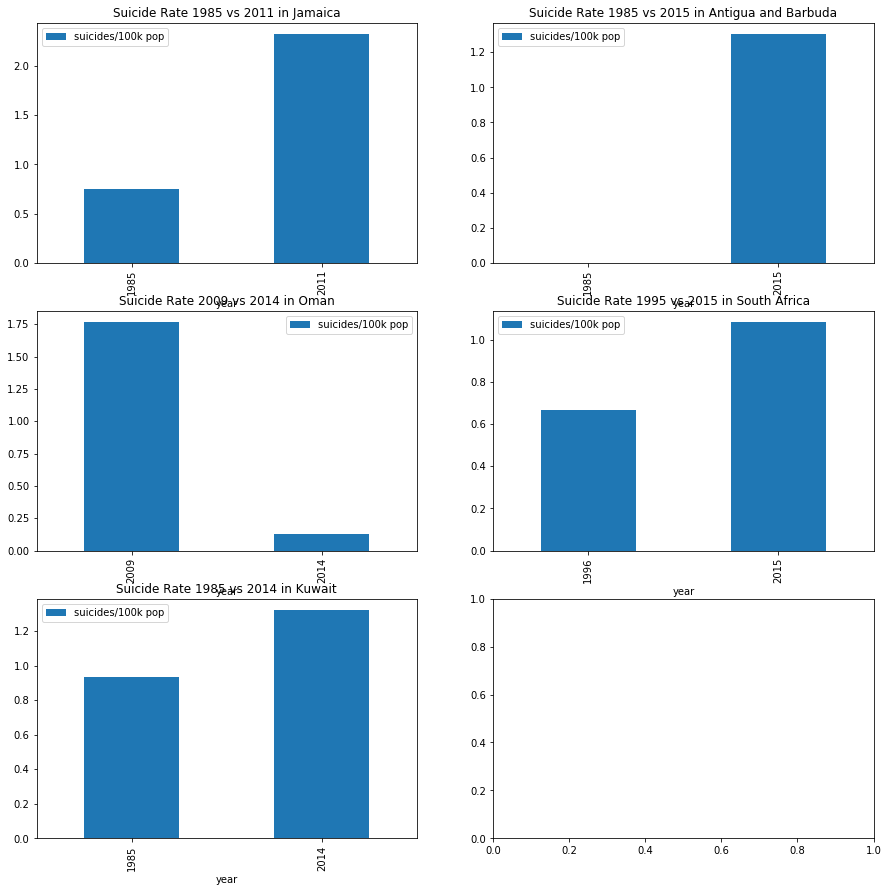

In [267]:
fig, axes = plt.subplots(3,2, figsize=(15,15))

Jamaica1985vs2011 = suicide1985vs2011[suicide1985vs2011.country =='Jamaica'].pivot_table('suicides/100k pop', index='year')
Antigua_Barbuda1985vs2015 = suicide1985vs2015[suicide1985vs2015.country =='Antigua and Barbuda'].pivot_table('suicides/100k pop', index='year')
Oman2009vs2014 = suicide2009vs2014[suicide2009vs2014.country =='Oman'].pivot_table('suicides/100k pop', index='year')
SA1995vs2015 = suicide1996vs2015[suicide1996vs2015.country =='South Africa'].pivot_table('suicides/100k pop', index='year')
Kuwait1985vs2014 = suicide1985vs2014[suicide1985vs2014.country =='Kuwait'].pivot_table('suicides/100k pop', index='year')

Jamaica1985vs2011.plot.bar(ax=axes[0,0], title = "Suicide Rate 1985 vs 2011 in Jamaica")
Antigua_Barbuda1985vs2015.plot.bar(ax=axes[0,1], title = "Suicide Rate 1985 vs 2015 in Antigua and Barbuda")
Oman2009vs2014.plot.bar(ax=axes[1,0], title = "Suicide Rate 2009 vs 2014 in Oman")
SA1995vs2015.plot.bar(ax=axes[1,1], title = "Suicide Rate 1995 vs 2015 in South Africa")
Kuwait1985vs2014.plot.bar(ax=axes[2,0], title = "Suicide Rate 1985 vs 2014 in Kuwait")

Except for Oman, suicide rate went up for the other four countries, which is about 1-2 people anually

# 3. Compare the suicide rate for the the earliest and latest year collected in the data by age group

In [225]:
suicide1995[suicide1995.country =='Lithuania'].pivot_table(values = 'suicides/100k pop', index=['age','sex'])

suicides/100k pop
age         sex                      
15-24 years female               7.79
            male                50.80
25-34 years female              11.95
            male                79.37
35-54 years female              23.47
            male               144.85
5-14 years  female               0.74
            male                 1.43
55-74 years female              24.70
            male               118.53
75+ years   female              33.76
            male               141.91

In [229]:
suicide2016[suicide2016.country =='Lithuania'].pivot_table(values = 'suicides/100k pop', index=['age','sex'])

suicides/100k pop
age         sex                      
15-24 years female               3.55
            male                23.05
25-34 years female               4.38
            male                50.17
35-54 years female              10.09
            male                70.62
55-74 years female              11.53
            male                76.32
75+ years   female              15.03
            male                96.98

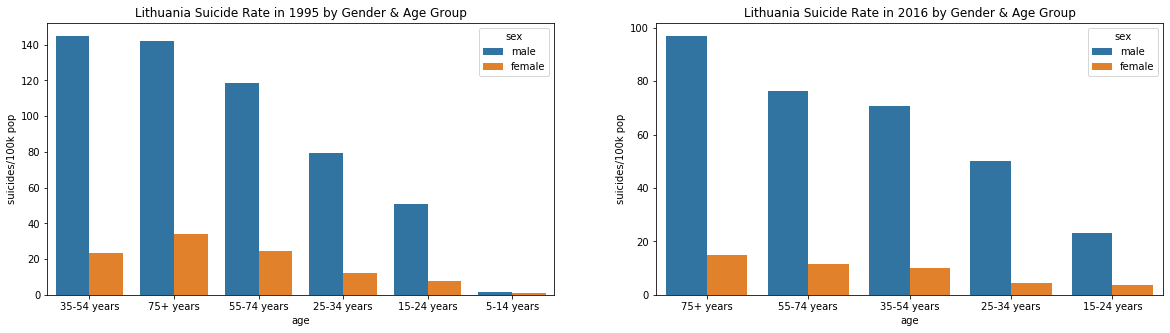

In [228]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
snsLithuania1995 = suicide1995[suicide1995.country =='Lithuania']
snsLithuania2016 = suicide2016[suicide2016.country =='Lithuania']
axes1 = sns.barplot(x='age',y='suicides/100k pop', hue='sex', data=snsLithuania1995, ax=axes[0]).set_title('Lithuania Suicide Rate in 1995 by Gender & Age Group')
axes2 = sns.barplot(x='age',y='suicides/100k pop', hue='sex', data=snsLithuania2016, ax=axes[1]).set_title('Lithuania Suicide Rate in 2016 by Gender & Age Group')

 ###  Lithuania
In 1995, 35-54 years group (N = 144.85) have the highest suicide rate for males. Also, 75+ years group (N = 141.91) was very close with the 35-54 years group suicide rate.
On the other hand, in 2016, 75+ years group (N=96.98) have the highest suicide rate for male, followed by 55-74 years group (N= 76.32)

As for female, 75+ years group is the highest in the suicide rate for both 1995 and 2016.


Male: There is a decrease (Δ = 47.87suicides/100k pop) in the highest suicide rate between 1995 and 2016.
Female: There is a decrease (Δ = 18.73suicides/100k pop) in the highest suicide rate between 1995 and 2016.

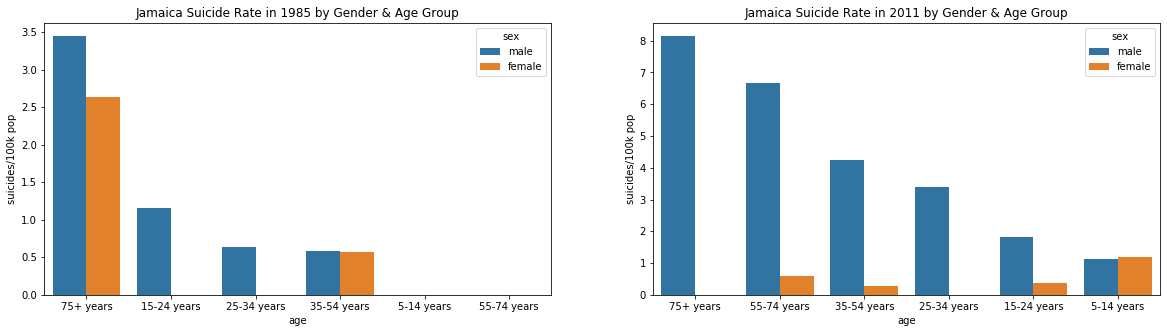

In [271]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
snsJamaica1985 = suicide1985[suicide1985.country =='Jamaica']
snsJamaica2011 = suicide2011[suicide2011.country =='Jamaica']
axes1 = sns.barplot(x='age',y='suicides/100k pop', hue='sex', data=snsJamaica1985, ax=axes[0]).set_title('Jamaica Suicide Rate in 1985 by Gender & Age Group')
axes2 = sns.barplot(x='age',y='suicides/100k pop', hue='sex', data=snsJamaica2011, ax=axes[1]).set_title('Jamaica Suicide Rate in 2011 by Gender & Age Group')

### Jamica
#### Male
##### Highest Suicide Rate
In 1985, 75+ years group have the hihgest suicide rate (N=3.4).  
In 2011, 75+ years group have the highest suicide rate (N=8.1).  
##### Lowest Suicide Rate
1985: 5-14 years and 55-74 years group , N = 0
2011: 5-14 years, N = 1

#### Female
##### Highest Suicide Rate
1985: 75+ years group, N= 2.61
2011: 5-14 years group, N = 1.32
##### Lowest Suicide Rate
1985: 15-24 years, 25-34 years,and 55-74 years group , N= 0 
2011: 25-34 years and 75 + years, N= 0  

# 4. Determine if there is a correlation between gdp per capita and suicide rate

In [273]:
suicide.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [285]:
rate_gdp_year = suicide[['suicides/100k pop', 'gdp_per_capita ($)', 'year']]

In [286]:
avg_rate_gdp_year = rate_gdp_year.pivot_table(values=("suicides/100k pop" ,'gdp_per_capita ($)'), index= 'year').reset_index()

In [289]:
avg_rate_gdp=avg_rate_gdp_year[['suicides/100k pop', 'gdp_per_capita ($)']]
avg_rate = avg_rate_gdp_year['suicides/100k pop']
avg_gdp = avg_rate_gdp_year['gdp_per_capita ($)']

In [290]:
np.corrcoef(avg_rate,avg_gdp)

array([[ 1.        , -0.55802175],
       [-0.55802175,  1.        ]])

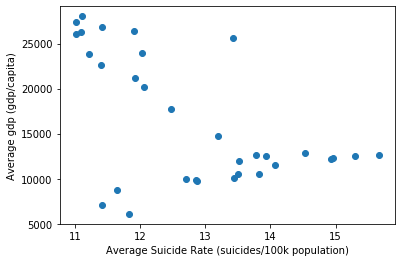

In [293]:
plt.scatter(avg_rate,avg_gdp)
plt.xlabel("Average Suicide Rate (suicides/100k population)")
plt.ylabel("Average gdp (gdp/capita)")
plt.show()

Globally, there is a negative correlation with average suicide rate vs average gdp per capita. This results states that as economy(gdp per capita) grows, suicide rate decreases. Let's look at two individual countries and see if global correlation matches with other two countries: South Korea and United States of Ameirca.

## South Korea

In [306]:
s_korea = suicide[suicide.country == 'Republic of Korea'].pivot_table(("suicides/100k pop" ,'gdp_per_capita ($)'), index= 'year').reset_index()

In [314]:
avg_skorea_rate = s_korea['suicides/100k pop']
avg_skorea_gdp = s_korea['gdp_per_capita ($)']

In [309]:
np.corrcoef(avg_skorea_rate,avg_skorea_gdp)

array([[1.        , 0.83969395],
       [0.83969395, 1.        ]])

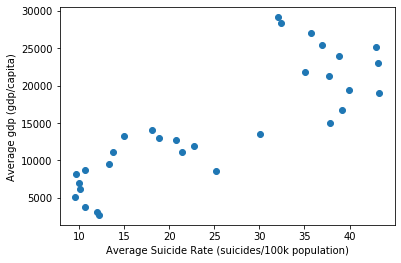

In [310]:
plt.scatter(avg_skorea_rate,avg_skorea_gdp)
plt.xlabel("Average Suicide Rate (suicides/100k population)")
plt.ylabel("Average gdp (gdp/capita)")
plt.show()

South Korea is a different story on the other hand. It has a strong positive correlation (0.84), which states that as gdp per capita grows, suicide rates increase.

## United States of America.

In [311]:
us = suicide[suicide.country == 'United States'].pivot_table(("suicides/100k pop" ,'gdp_per_capita ($)'), index= 'year').reset_index()

In [315]:
avg_us_rate = us['suicides/100k pop']
avg_us_gdp =us['gdp_per_capita ($)']

In [318]:
np.corrcoef(avg_us_rate,avg_us_gdp)

array([[ 1.        , -0.63426062],
       [-0.63426062,  1.        ]])

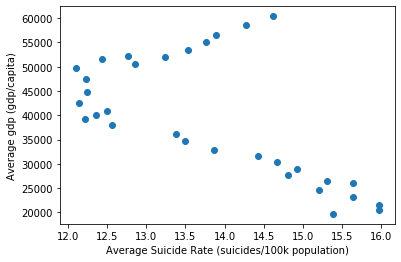

In [319]:
plt.scatter(avg_us_rate,avg_us_gdp)
plt.xlabel("Average Suicide Rate (suicides/100k population)")
plt.ylabel("Average gdp (gdp/capita)")
plt.show()

United States of America have the same result as to global correaltion. US has a negative correlation (-0.63).